In [176]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import seaborn as sns
import sys
import time

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC  
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

from lightning.classification import FistaClassifier

%matplotlib inline 

In [177]:
df = pd.read_csv('Abalone.csv')
df.head()

,sex,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [178]:
#df.info()

sex
F    1307
I    1342
M    1528
dtype: int64


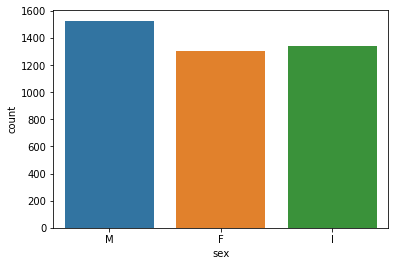

In [179]:
print(df.groupby('sex').size())
sns.countplot(df['sex'],label="Count")
plt.show()

In [180]:
test_per = int(len(df.index)*0.9) #actual is 0.1-0.9
print("test size:", int(len(df.index)- test_per))
testdf = df[test_per:]
df = df[:test_per]
df.shape
print(df.groupby('sex').size())

test size: 418
sex
F    1181
I    1208
M    1370
dtype: int64


In [181]:
def add_labelnoise(noise_level, seed=None):
    np.random.seed(seed) 
   # train_p = int(noise_level * len(traindf.index))
   # validate_p = int(noise_level * len(valdf.index)) 
   # x = np.random.randint(low = 0, high = len(traindf)-train_p)
  #  y = np.random.randint(low = 0, high = len(valdf)-validate_p)
   # print(y)
    l = int(noise_level*len(df.index))
    for i in range(l):
        if df['sex'][i]=='M':
            df['sex'][i]='F'
        elif df['sex'][i]=='F':
            df['sex'][i]='M'
        elif df['sex'][i]=='I':
            df['sex'][i]=str(*np.random.choice(['M','F'], 1))

        
    #return traindf, valdf

#t.head(20)
#t['Outcome'][:10]

add_labelnoise(0.30)
df.head()

c:\python35\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
c:\python35\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
c:\python35\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,sex,length,diameter,height,weight.w,weight.s,weight.v,weight.sh,rings
0,F,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,F,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,M,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,F,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,M,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [183]:
print(df.groupby('sex').size())

sex
F    1381
I     900
M    1478
dtype: int64


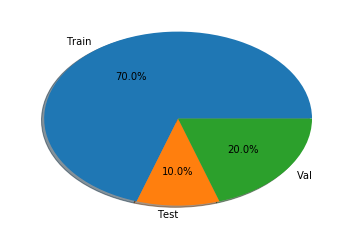

Train set (3007, 9)
Test set (418, 9)
Validation set (752, 9)
sex
F    1099
I     728
M    1180
dtype: int64


In [184]:
#split our data into train and test
#traindf, testdf = train_test_split(df, test_size = 0.3)
#traindf, valdf, testdf = train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None)
traindf, valdf = train_test_split(df, test_size = 0.2)
labels = 'Train', 'Test', 'Val'
plt.pie([70, 10, 20], labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()
print("Train set", traindf.shape)
print("Test set", testdf.shape)
print("Validation set", valdf.shape)

print(traindf.groupby('sex').size())

In [185]:
train_X=traindf[traindf.columns[1:]]
val_X=valdf[testdf.columns[1:]]
train_Y=traindf['sex']
val_Y=valdf['sex']
test_X=testdf[testdf.columns[1:]]
test_Y=testdf['sex']

In [187]:
X = train_X
y = train_Y
clf = LinearSVC(penalty='l1', loss='squared_hinge', dual=False, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.5598086124401914
Cross_val score : 0.49355280819498415


In [189]:
clf = LinearSVC(penalty='l2', loss='hinge', dual=True, tol=1e-3, C=1.0,
               multi_class='ovr', fit_intercept=True, intercept_scaling=1,
               class_weight=None, verbose=0, random_state=None, max_iter=1000)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


Accuracy : 0.5406698564593302
Cross_val score : 0.49453314494289413


In [160]:
clf = SGDClassifier(loss='hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.44019138755980863
Cross_val score : 0.5035942533118429


In [173]:
clf = SGDClassifier(loss='squared_hinge', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.5311004784688995
Cross_val score : 0.5330787801095254


In [167]:
clf = SGDClassifier(loss='modified_huber', penalty='l1', alpha=0.0001, l1_ratio=0.15,
                    fit_intercept=True, max_iter=1000, tol=1e-3, shuffle=True,
                    verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, 
                    class_weight=None, warm_start=False, average=False, n_iter=None)
clf.fit(X,y)
print("Accuracy :", clf.score(test_X, test_Y))
scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())

Accuracy : 0.5119617224880383
Cross_val score : 0.5106493621938754


## FISTA

In [156]:


# Set classifier options.
clf = FistaClassifier(C=1.0, alpha=1.0, loss='squared_hinge', penalty='l1',
                      multiclass=True, max_iter=1000, max_steps=30, eta=2.0,
                      sigma=1e-05, callback=None, verbose=0  )

# Train the model.
clf.fit(X, y)


# Accuracy
print("Accuracy :", clf.score(test_X, test_Y))

# Percentage of selected features
print(clf.n_nonzero(percentage=True))

scores = cross_val_score(clf, val_X, val_Y, cv=5, scoring='accuracy')
print("Cross_val score :", scores.mean())


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy : 0.5478468899521531
1.0


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.si

Cross_val score : 0.573063481183959


c:\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
